In [110]:
'''
Jupyter notebook for exploring data in CSV files
downloaded from National Endowment for the Humanities.

Source: https://securegrants.neh.gov/publicquery/main.aspx

author: Samuel J. Huskey

'''

import pandas as pd
import os
pd.options.mode.chained_assignment = None

In [2]:
# Get the list of files from the NEH directory
files = os.listdir('../NEH')

In [3]:
# List the files so that we'll know what we have.
for file in files:
    print(file)

wisconsin.csv
minnesota.csv
maryland.csv
north-carolina-ch.csv
rutgers.csv
texas-am.csv
ut-austin.csv
florida.csv
michigan.csv
penn-state.csv
pittsburgh.csv
stony-brook.csv
buffalo.csv
uc-davis.csv
ga-tech.csv
purdue.csv
u-of-iowa.csv
colorado.csv
uc-berkeley.csv
michigan-state.csv
utah.csv
virginia.csv
ucla.csv
ucsd.csv
u-illinois.csv
arizona.csv
ucsb.csv
ucsc.csv
oregon.csv
ohio-state.csv
indiana-u.csv
kansas.csv
washington.csv
uc-irvine.csv
missouri.csv


In [4]:
''' 
Count the files. There should be 35, since there are 
35 public AAU universities currently.
'''
len(files)

35

In [5]:
# Make a big dataframe so that we can use Pandas.
dfs = {}
for file in files:
    # Strip '.csv' from the name of the file.
    filename = file[:-4]
    filepath = '../NEH/' + file
    df = pd.read_csv(filepath)
    dfs.update({filename:df})
big_frame = pd.concat([(dfs.get(i)) for i in dfs.keys()])

In [95]:
# Get a big picture of the data using info().
big_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9590 entries, 0 to 154
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ApplicationID                  9590 non-null   int64  
 1   ApplicationNumber              9590 non-null   object 
 2   ApplicantType                  9590 non-null   int64  
 3   SuppCount                      9590 non-null   int64  
 4   ProductCount                   9590 non-null   int64  
 5   CoverageCount                  9590 non-null   int64  
 6   PrizeCount                     9590 non-null   int64  
 7   ParticipatingInstitutionCount  9590 non-null   int64  
 8   WhitePaper                     9590 non-null   int64  
 9   WhitePaperPath                 167 non-null    object 
 10  PDFirstname                    9590 non-null   object 
 11  PDMiddlename                   6406 non-null   object 
 12  PDLastname                     9590 non-null   ob

In [96]:
# Preview the data using head() to show the first five rows.
big_frame.head()

,ApplicationID,ApplicationNumber,ApplicantType,SuppCount,ProductCount,CoverageCount,PrizeCount,ParticipatingInstitutionCount,WhitePaper,WhitePaperPath,...,OfferedMatching,ApprovedOutright,ApprovedMatching,AwardOutright,AwardMatching,OriginalAmount,SupplementAmount,GrantPeriod,ProjectDesc,ToSupport
0,285080,PW-285080-22,1,0,0,0,0,0,0,NaN,...,0.0,326326.0,0.0,326326.0,0.0,326326.0,0.0,6/1/2022 &ndash; 5/31/2025,"<p>The arrangement and\ndescription of 1,000 l...",NaN
1,272983,FEL-272983-21,2,0,0,0,0,0,0,NaN,...,0.0,60000.0,0.0,60000.0,0.0,60000.0,0.0,1/1/2022 &ndash; 12/31/2022,<p>Research and writing leading of a book abou...,NaN
2,273380,FEL-273380-21,2,0,0,0,0,0,0,NaN,...,0.0,60000.0,0.0,60000.0,0.0,60000.0,0.0,1/1/2022 &ndash; 12/31/2022,<p>Research and writing leading to a book abou...,NaN
3,277395,PW-277395-21,1,0,0,0,0,0,0,NaN,...,165000.0,185000.0,165000.0,185000.0,165000.0,350000.0,0.0,7/1/2021 &ndash; 6/30/2023,<p>The&nbsp;production of the fifth and final ...,NaN
4,278085,DR-278085-21,1,0,0,0,0,0,0,NaN,...,0.0,5500.0,0.0,5500.0,0.0,5500.0,0.0,1/1/2021 &ndash; 6/30/2022,"<p>This project will publish the book ""Citizen...",NaN


In [97]:
# Use set() to get a list of institutions included in the data.
set(big_frame['Institution'])

{'Arizona Board of Regents',
 'Board of Regents of the University of Oklahoma',
 'Board of Trustees of the University of Illinois',
 'Boston University',
 'Brown University in Providence in the State of Rhode Island',
 'Central University of Iowa',
 'Curators of the University of Missouri',
 'Georgia Tech',
 'Indiana University Alumni Association',
 'Indiana University East',
 'Indiana University Northwest',
 'Indiana University Press',
 'Indiana University Southeast',
 'Indiana University at South Bend',
 'Indiana University of Pennsylvania',
 'Indiana University of Pennsylvania Research Institute',
 'Indiana University, Kokomo',
 'Indiana University, Purdue University at Fort Wayne',
 'Indiana/Purdue University, Indianapolis',
 'Iowa State University of Science and Technology',
 'Kansas Humanities Council',
 'MLA',
 'Miami University',
 'Michigan State University',
 'Michigan State University Press',
 'Mizzou',
 'Ohio State University',
 'Ohio State University Research Foundation',
 

In [9]:
# Turn that set into a list.
institution_list = list(set(big_frame['Institution']))
institution_list

['Pennsylvania State University, Hazleton Campus',
 'Central University of Iowa',
 'Pennsylvania State University, York Campus',
 'Michigan State University',
 'Rutgers, The State University of New Jersey',
 'Washington University',
 'University of North Carolina at Chapel Hill',
 'Miami University',
 'Texas A & M University, College Station',
 'University of Maryland, College Park',
 'Pennsylvania State University, Abington Campus',
 'Virginia Tech',
 'Pennsylvania State University, Brandywine',
 'University of Kansas, Lawrence',
 'Texas A & M University, Central Texas',
 'University of Oregon Health Sciences Center',
 'University of Virginia, Clinch Valley College',
 'University of Iowa',
 'Pennsylvania State University, Wilkes-Barre Campus',
 'University of Minnesota, University Gallery',
 'Purdue University Calumet Campus',
 'Regents of the University of California, Davis',
 'Ohio State University',
 'Pennsylvania State University, Beaver Campus',
 'University of Wisconsin Extensio

In [10]:
# Make a list of only AAU institutions.
aau_list = ['University of Kansas, Lawrence',
            'Georgia Tech',
            'University of Maryland, College Park',
            'Mizzou',
            'Board of Trustees of the University of Illinois',
            'UCLA; Regents of the University of California, Los Angeles',
            'Penn State',
            'University of Florida',
            'Purdue University',
            'Rutgers, The State University of New Jersey',
            'Michigan State University',
            'University of Wisconsin System',
            'Trustees of Indiana University',
            'Texas A & M University, College Station',
            'Regents of the University of California, Irvine',
            'University of North Carolina at Chapel Hill', 
            'University of Virginia', 
            'University of Minnesota', 
            'University of California, Berkeley',
            'Regents of the University of Colorado, Boulder',
            'University of Texas, Austin',
            'Regents of the University of California, San Diego',
            'University of Washington',
            'Regents of the University of California, Davis',
            'University of Utah',
            'Regents of the University of California, Santa Barbara',
            'SUNY Research Foundation, Stony Brook',
            'Regents of the University of Michigan',
            'Regents of the University of California, Santa Cruz',
            'University of Iowa',
            'SUNY Research Foundation, Buffalo State College',
            'Arizona Board of Regents',
            'Ohio State University',
            'University of Pittsburgh',
            'University of Oregon',
           ]

In [11]:
# How many institutions are in the aau_list? There should be 35.
len(aau_list)

35

In [12]:
# Filter the data so that it includes only AAU institutions.
aau_frame = big_frame[big_frame['Institution'].isin(aau_list)]
print(f"Original: ", len(big_frame))
print(f"Filtered: ", len(aau_frame))

Original:  9590
Filtered:  8929


In [13]:
# Make a dataframe with only the columns that we need.
# First: evaluate the columns available.
aau_frame.columns

Index(['ApplicationID', 'ApplicationNumber', 'ApplicantType', 'SuppCount',
       'ProductCount', 'CoverageCount', 'PrizeCount',
       'ParticipatingInstitutionCount', 'WhitePaper', 'WhitePaperPath',
       'PDFirstname', 'PDMiddlename', 'PDLastname', 'PDNameSuffix',
       'CoPDFirstname', 'CoPDMiddlename', 'CoPDLastname', 'CoPDNameSuffix',
       'Participants', 'GranteeDisplay', 'Institution', 'InstCity',
       'InstState', 'InstPostalCode', 'InstCountry', 'CouncilDate',
       'YearAwarded', 'ProjectTitle', 'PrimaryDiscipline', 'AllDisciplines',
       'ProgramID', 'ProgramName', 'DivisionID', 'DivisionName',
       'OfferedOutright', 'OfferedMatching', 'ApprovedOutright',
       'ApprovedMatching', 'AwardOutright', 'AwardMatching', 'OriginalAmount',
       'SupplementAmount', 'GrantPeriod', 'ProjectDesc', 'ToSupport'],
      dtype='object')

In [14]:
# What's in "ApplicantType"?
aau_frame['ApplicantType']

0      1
1      2
2      2
3      1
4      1
      ..
150    2
151    2
152    2
153    2
154    2
Name: ApplicantType, Length: 8929, dtype: int64

In [15]:
'''
That's not very useful! 
We'll probably want at least Institution, YearAwarded, 
ProjectTitle, PrimaryDiscipline, ProgramName, 
DivisionName, and AwardOutright
'''
data = aau_frame[['Institution','ProjectTitle','PrimaryDiscipline','ProgramName','DivisionName','AwardOutright','YearAwarded']]
data

,Institution,ProjectTitle,PrimaryDiscipline,ProgramName,DivisionName,AwardOutright,YearAwarded
0,University of Wisconsin System,"Accessing the History of Health, Pharmacy, and...","History, General",Humanities Collections and Reference Resources,Preservation and Access,326326.0,2022
1,University of Wisconsin System,"""Alternative Modernities"" and the Modernizatio...",Theater History and Criticism,Fellowships,Research Programs,60000.0,2020
2,University of Wisconsin System,"The Ford Foundation, Social Science, and the P...",Latin American History,Fellowships,Research Programs,60000.0,2020
3,University of Wisconsin System,The History of Cartography Project,"Interdisciplinary Studies, General",Humanities Collections and Reference Resources,Preservation and Access,185000.0,2021
4,University of Wisconsin System,"Open Access Edition of ""Citizen Countess: Sofi...",Russian History,Fellowships Open Book Program,Digital Humanities,5500.0,2020
...,...,...,...,...,...,...,...
150,Mizzou,Utopian Societies Founded in the Soviet Union ...,"History, General",Summer Stipends,Research Programs,1500.0,1970
151,Mizzou,The Process of Government During the Presidenc...,"History, General",Fellowships for University Teachers,Research Programs,15500.0,1970
152,Mizzou,Dr. Johnson and the New Philosophy,"Philosophy, General",Summer Stipends,Research Programs,1500.0,1970
153,Mizzou,Title not available,"History, General",Fellowships for Younger Scholars,Fellowships and Seminars,8387.0,1967


In [16]:
# Use value_counts() to get the number of awards per institution.
total_number = data['Institution'].value_counts()
total_number

University of California, Berkeley                            660
Regents of the University of Michigan                         575
Trustees of Indiana University                                515
UCLA; Regents of the University of California, Los Angeles    506
University of Virginia                                        468
University of Texas, Austin                                   413
University of Wisconsin System                                405
Board of Trustees of the University of Illinois               379
University of North Carolina at Chapel Hill                   333
University of Maryland, College Park                          310
University of Minnesota                                       296
Rutgers, The State University of New Jersey                   270
University of Washington                                      252
Regents of the University of California, Santa Barbara        245
Arizona Board of Regents                                      243
University

In [17]:
# Find out what type of data we're dealing with now.
type(total_number)

pandas.core.series.Series

<AxesSubplot:>

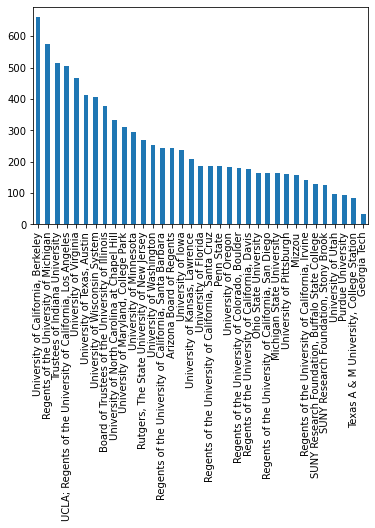

In [18]:
# It's a series. We can plot it as a simple bar graph.
total_number.plot.bar()

In [19]:
total_frame = data['Institution'].value_counts().rename_axis('Institition').reset_index()
total_frame.columns = ['Institution', 'Grants']
total_frame

,Institution,Grants
0,"University of California, Berkeley",660
1,Regents of the University of Michigan,575
2,Trustees of Indiana University,515
3,"UCLA; Regents of the University of California,...",506
4,University of Virginia,468
5,"University of Texas, Austin",413
6,University of Wisconsin System,405
7,Board of Trustees of the University of Illinois,379
8,University of North Carolina at Chapel Hill,333
9,"University of Maryland, College Park",310


In [20]:
# Use nlargest() to get the top ten institutions by number of grants received.
top_ten = total_frame.nlargest(10,'Grants').set_index('Institution')
top_ten

,Grants
Institution,
"University of California, Berkeley",660
Regents of the University of Michigan,575
Trustees of Indiana University,515
"UCLA; Regents of the University of California, Los Angeles",506
University of Virginia,468
"University of Texas, Austin",413
University of Wisconsin System,405
Board of Trustees of the University of Illinois,379
University of North Carolina at Chapel Hill,333


<AxesSubplot:ylabel='Grants'>

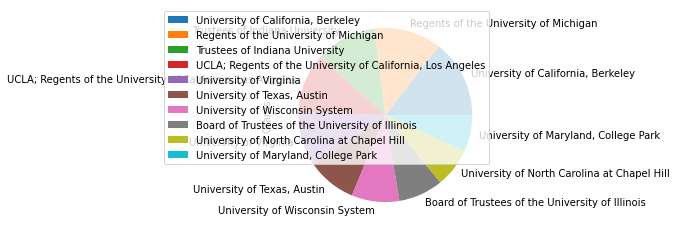

In [21]:
# Let's make a pie chart of the top ten!
top_ten.plot.pie(y='Grants')

<AxesSubplot:>

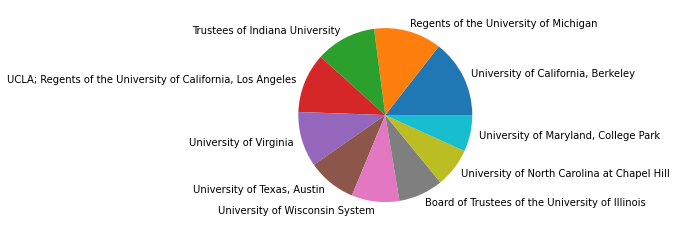

In [22]:
# That's kind of ugly! Let's get rid of the label and legend.
top_ten.plot.pie(y='Grants',label='',legend=False)

In [23]:
# Let's take a look at dates.
print(f'The earliest date: ', data['YearAwarded'].min())
print(f'The latest date: ', data['YearAwarded'].max())

The earliest date:  1966
The latest date:  2022


In [25]:
# Make dataframes of the earliest and most recent years per institution.
maximum = data.groupby(['Institution'])['YearAwarded'].max().reset_index()
minimum = data.groupby(['Institution'])['YearAwarded'].min().reset_index()

In [26]:
# Merge the minimum and maximum frames.
merged = pd.merge(minimum,maximum, on='Institution')
merged

,Institution,YearAwarded_x,YearAwarded_y
0,Arizona Board of Regents,1967,2021
1,Board of Trustees of the University of Illinois,1967,2022
2,Georgia Tech,1970,2017
3,Michigan State University,1967,2022
4,Mizzou,1967,2021
5,Ohio State University,1967,2021
6,Penn State,1967,2021
7,Purdue University,1967,2021
8,"Regents of the University of California, Davis",1967,2022
9,"Regents of the University of California, Irvine",1967,2022


In [27]:
# Let's rename YearAwarded_x and YearAwarded_y to "Earliest" and "Latest".
merged = merged.rename(columns={'YearAwarded_x':'Earliest','YearAwarded_y':'Latest'})
merged

,Institution,Earliest,Latest
0,Arizona Board of Regents,1967,2021
1,Board of Trustees of the University of Illinois,1967,2022
2,Georgia Tech,1970,2017
3,Michigan State University,1967,2022
4,Mizzou,1967,2021
5,Ohio State University,1967,2021
6,Penn State,1967,2021
7,Purdue University,1967,2021
8,"Regents of the University of California, Davis",1967,2022
9,"Regents of the University of California, Irvine",1967,2022


In [28]:
# Let's find out more about the awards.
data['ProgramName'].unique().tolist()

['Humanities Collections and Reference Resources',
 'Fellowships',
 'Fellowships Open Book Program',
 'Summer Stipends',
 'Scholarly Editions and Translations',
 'Preservation Assistance Grants',
 'Humanities Connections',
 'Digital Humanities Advancement Grants',
 'Fellowships for University Teachers',
 'Challenge Grants',
 'Fellowships for Advanced Social Science Research on Japan',
 'Research and Development',
 'Documenting Endangered Languages - Preservation',
 'Reference Materials',
 'Preservation/Access Projects',
 'Humanities Projects in Media',
 'Collaborative Research',
 'Education Development and Demonstration',
 'Institutes for Higher Education Faculty',
 'Regional Center Implementation Grants',
 'Institutes for K-12 Educators',
 'Humanities Projects in Libraries and Archives',
 'Regional Center Planning Grants',
 'Basic Research',
 'Seminars for K-12 Educators',
 'Seminars for Higher Education Faculty',
 'Humanities Projects in Museums and Historical Organizations',
 'Editi

In [29]:
'''
Some of those awards don't look relevant to AAU considerations.
Let's look at the divisions that award the grants.
'''
data['DivisionName'].unique().tolist()

['Preservation and Access',
 'Research Programs',
 'Digital Humanities',
 'Education Programs',
 'Challenge Programs',
 'Public Programs',
 'Agency-wide Projects',
 'Fellowships and Seminars',
 'Federal/State Partnership']

In [30]:
# Let's get counts of the grants from those programs.
data['DivisionName'].value_counts()

Research Programs            5287
Education Programs           1360
Preservation and Access       852
Fellowships and Seminars      701
Public Programs               427
Digital Humanities            173
Challenge Programs             84
Agency-wide Projects           33
Federal/State Partnership      12
Name: DivisionName, dtype: int64

<AxesSubplot:>

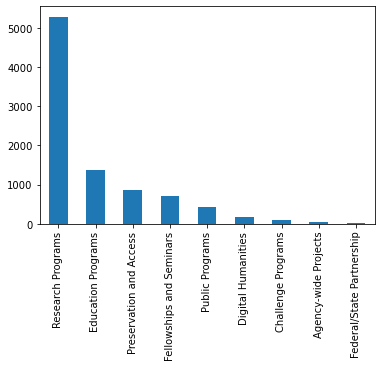

In [31]:
# Bar graph, anyone?
data['DivisionName'].value_counts().plot.bar()

In [38]:
'''
Okay, let's filter the data to show only
grants from Research Programs.
'''
programs = ['Research Programs', 'Digital Humanities']
aau_research = data[data['DivisionName'].isin(programs)]
print(f"Original: ", len(big_frame))
print(f"AAU Only: ", len(aau_frame))
print(f"Research Programs Only: ", len(aau_research))

Original:  9590
AAU Only:  8929
Research Programs Only:  5460


In [41]:
# What are the disciplines that receive grants?
aau_research['PrimaryDiscipline'].value_counts().nlargest(20)

U.S. History                                                   420
Interdisciplinary Studies, General                             315
History, General                                               262
British Literature                                             225
European History                                               200
Archaeology                                                    194
Music History and Criticism                                    190
American Literature                                            190
Literature, General                                            189
Art History and Criticism                                      185
Anthropology                                                   141
Philosophy, General                                            139
Linguistics                                                    130
East Asian History                                             105
History and Philosophy of Science, Technology, and Medicine   

<AxesSubplot:ylabel='False'>

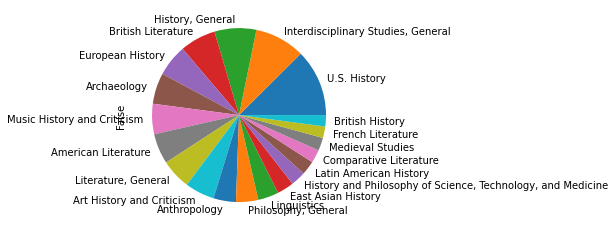

In [93]:
aau_research['PrimaryDiscipline'].value_counts().nlargest(20).plot.pie(label=False)

In [ ]:
# I want to see all of the rows!
pd.set_option('display.max_rows', None)

In [98]:
aau_research['ProjectTitle']

1      "Alternative Modernities" and the Modernizatio...
2      The Ford Foundation, Social Science, and the P...
4      Open Access Edition of "Citizen Countess: Sofi...
5      Return Travel: The African Diaspora Across Gen...
6      The Documentary History of the Ratification of...
                             ...                        
149      Excavation of the Ancient Harbor of Cosa, Italy
150    Utopian Societies Founded in the Soviet Union ...
151    The Process of Government During the Presidenc...
152                   Dr. Johnson and the New Philosophy
154                                  Title not available
Name: ProjectTitle, Length: 5460, dtype: object

In [111]:
aau_research['ProjectTitle_lower'] = aau_research['ProjectTitle'].str.lower()
aau_research['ProjectTitle_lower']

1      "alternative modernities" and the modernizatio...
2      the ford foundation, social science, and the p...
4      open access edition of "citizen countess: sofi...
5      return travel: the african diaspora across gen...
6      the documentary history of the ratification of...
                             ...                        
149      excavation of the ancient harbor of cosa, italy
150    utopian societies founded in the soviet union ...
151    the process of government during the presidenc...
152                   dr. johnson and the new philosophy
154                                  title not available
Name: ProjectTitle_lower, Length: 5460, dtype: object

In [112]:
from nltk.tokenize import RegexpTokenizer
regexp = RegexpTokenizer('\w+')

In [118]:
aau_research['TitleToken'] = aau_research['ProjectTitle_lower'].copy(deep=True).apply(regexp.tokenize)
aau_research['TitleToken']

1      [alternative, modernities, and, the, moderniza...
2      [the, ford, foundation, social, science, and, ...
4      [open, access, edition, of, citizen, countess,...
5      [return, travel, the, african, diaspora, acros...
6      [the, documentary, history, of, the, ratificat...
                             ...                        
149    [excavation, of, the, ancient, harbor, of, cos...
150    [utopian, societies, founded, in, the, soviet,...
151    [the, process, of, government, during, the, pr...
152             [dr, johnson, and, the, new, philosophy]
154                              [title, not, available]
Name: TitleToken, Length: 5460, dtype: object

In [119]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sjhuskey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [121]:
aau_research['TitleStop'] = aau_research['TitleToken'].apply(lambda x: [item for item in x if item not in stopwords])

In [122]:
aau_research['TitleStop']

1      [alternative, modernities, modernization, urba...
2      [ford, foundation, social, science, politics, ...
4      [open, access, edition, citizen, countess, sof...
5      [return, travel, african, diaspora, across, ge...
6      [documentary, history, ratification, constitut...
                             ...                        
149           [excavation, ancient, harbor, cosa, italy]
150    [utopian, societies, founded, soviet, union, a...
151    [process, government, presidency, thomas, jeff...
152                       [dr, johnson, new, philosophy]
154                                   [title, available]
Name: TitleStop, Length: 5460, dtype: object

In [123]:
aau_research['TitleNoShorts'] = aau_research['TitleStop'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

In [124]:
aau_research['TitleNoShorts']

1      alternative modernities modernization urban th...
2      ford foundation social science politics povert...
4      open access edition citizen countess sofia pan...
5      return travel african diaspora across genres m...
6      documentary history ratification constitution ...
                             ...                        
149                 excavation ancient harbor cosa italy
150    utopian societies founded soviet union america...
151       process government presidency thomas jefferson
152                               johnson new philosophy
154                                      title available
Name: TitleNoShorts, Length: 5460, dtype: object

In [125]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sjhuskey/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sjhuskey/nltk_data...


True

In [126]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

In [127]:
aau_research['TitleLemmatized'] = aau_research['TitleNoShorts'].apply(wordnet_lem.lemmatize)

In [128]:
aau_research['TitleLemmatized']

1      alternative modernities modernization urban th...
2      ford foundation social science politics povert...
4      open access edition citizen countess sofia pan...
5      return travel african diaspora across genres m...
6      documentary history ratification constitution ...
                             ...                        
149                 excavation ancient harbor cosa italy
150    utopian societies founded soviet union america...
151       process government presidency thomas jefferson
152                               johnson new philosophy
154                                      title available
Name: TitleLemmatized, Length: 5460, dtype: object

In [130]:
aau_research['is_equal']= (aau_research['TitleNoShorts']==aau_research['TitleLemmatized'])

In [132]:
aau_research.is_equal.value_counts()

True    5460
Name: is_equal, dtype: int64

In [137]:
all_words = ' '.join([word for word in aau_research['TitleLemmatized']])

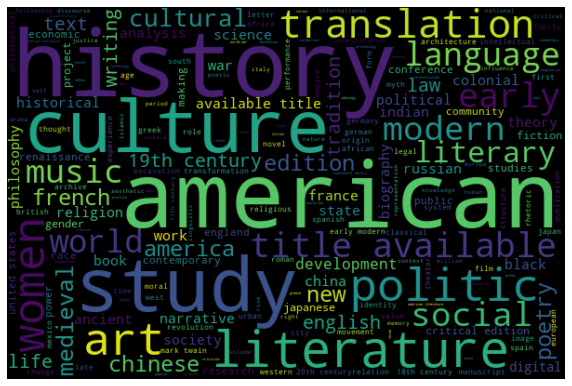

In [138]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

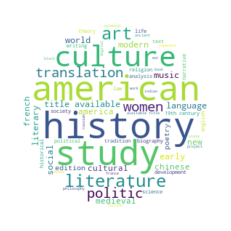

In [139]:
import numpy as np

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear");

In [140]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/sjhuskey/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [141]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words)
fd = FreqDist(words)

In [142]:
fd.most_common(3)

[('history', 413), ('american', 377), ('century', 356)]

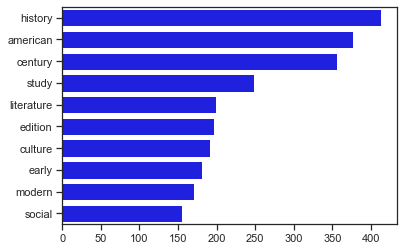

In [143]:
top_10 = fd.most_common(10)
fdist = pd.Series(dict(top_10))
import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='blue');